In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

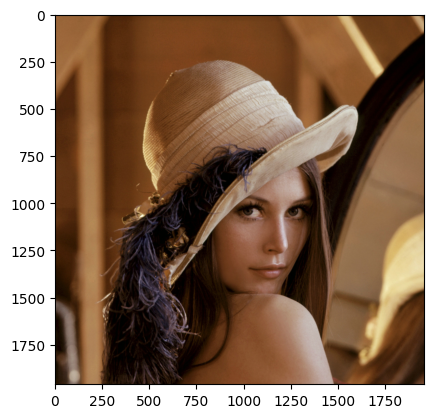

In [49]:
K = mpimg.imread('Lenna.jpg')
imgplot = plt.imshow(K)
plt.show()

In [32]:
row=K.shape[0]
col=K.shape[1]

J= row * col
Size = row,col,3
R = np.zeros(Size, dtype= np.uint8)
image_to_list=np.zeros((J,5))
arr=np.array((1,3))

In [33]:
counter = 0
iter = 1

for i in range(row):
    for j in range(col):
        arr = K[i][j]

        for k in range(0, 5):
            if (k >= 0) & (k <= 2):
                image_to_list[counter][k] = arr[k]
            else:
                if k == 3:
                    image_to_list[counter][k] = i
                else:
                    image_to_list[counter][k] = j
        counter += 1

In [34]:
image_to_list[0]

array([0.6156863 , 0.        , 0.87058824, 0.        , 0.        ])

In [50]:
gray_image = (K[:,:,0] + K[:,:,1] + K[:,:,2])/3
# flattened_image = gray_image.reshape(-1)

In [54]:
K.shape

(1960, 1960, 3)

In [37]:
from math import sqrt

sqrt(65536)

256.0

In [ ]:
.reshap([2,3])

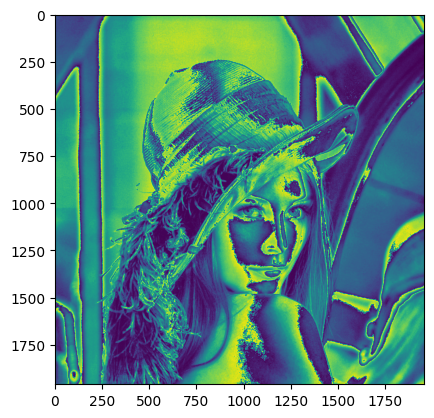

In [51]:
# image = flattened_image.reshape(256,256)
import matplotlib.pyplot as plt

plt.imshow(gray_image)
plt.show()

In [15]:
import numba
import numba.cuda as cuda

In [16]:
image = plt.imread('house.png')

In [17]:
@cuda.jit
def grayscale_kernel(image, gray_image):
    # Get the current thread index
    i, j = cuda.grid(2)
    
    # Get the image shape
    height, width, channels = image.shape
    
    # Check if the current thread is within the bounds of the image
    if i < height and j < width:
        # Convert the pixel to grayscale using the standard coefficients
        gray_image[i, j] = 0.2989 * image[i, j, 0] + 0.5870 * image[i, j, 1] + 0.1140 * image[i, j, 2]


In [18]:
image_gpu = cuda.to_device(image)
gray_image_gpu = cuda.to_device(np.empty_like(image))


In [ ]:
grayscale_kernel[(image.shape[0], image.shape[1]), (1, 1)](image_gpu, gray_image_gpu)


In [ ]:
gray_image = gray_image_gpu.copy_to_host()


In [ ]:
plt.imshow(gray_image, cmap='gray')
plt.show()
